# Imports and Constants

In [1]:
import json
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

PIDs = [
    "ngFQZ3PEO5NJ",
    "JT7ru39Irzx7",
    "a6RSZr6Rflrh",
    "SyndXrJWn1Ei",
    "HuW1wIIebZWn",
    "NvepUR3xQYb3",
    "w7TNykrDwr1q",
    "tqJLycRmlf6B",
    "CoYhbad22Jko",
    "w7TXwcLz7Ydb",
    "ruM5fRj1p3f9",
    "wQez7lrGYiza",
    "xnfPy13ddVDB",
    "2Ispy3RTXFLN",
    "MQNQXUlXMlJG",
    "yvoRfW5318GY"
]

# Collect data

In [2]:
meta_dfs = []
interactions_dfs = []

for pid in PIDs:
    # get data
    with open(os.path.join("data", "participants", pid, f"session_log_{pid}.json"), "r") as f:
        d = json.load(f)

    # condition/dataset/task order
    cd1 = d["conditionOrder"][0]
    cd2 = d["conditionOrder"][1]
    ds1 = d["datasetOrder"][0]
    ds2 = d["datasetOrder"][1]
    pt1 = d["practiceTaskOrder"][0]
    pt2 = d["practiceTaskOrder"][1]

    # page records
    lac = d["live-activity-control"]
    laa = d["live-activity-augmentation"]

    # order
    if cd1 == "control" and ds1 == "colleges":
        order = 1
    elif cd1 == "control" and ds1 == "loans":
        order = 2
    elif cd1 == "augmentation" and ds1 == "colleges":
        order = 3
    elif cd1 == "augmentation" and ds1 == "loans":
        order = 4

    # condition/dataset/task order settings
    if order == 1:
        lpct = pt1  # live practice control task = practice task 1
        lact1 = "CQ1"  # live activity control task 1 = colleges question 1
        lact2 = "CQ2"  # live activity control task 2 = colleges question 2
        lpat = pt2  # live practice augmentation task = practice task 2
        laat1 = "LQ1"  # live activity augmentation task 1 = loans question 1
        laat2 = "LQ2"  # live activity augmentation task 2 = loans question 2
    elif order == 2:
        lpct = pt1  # live practice control task = practice task 1
        lact1 = "LQ1"  # live activity control task 1 = loans question 1
        lact2 = "LQ2"  # live activity control task 2 = loans question 2
        lpat = pt2  # live practice augmentation task = practice task 2
        laat1 = "CQ1"  # live activity augmentation task 1 = colleges question 1
        laat2 = "CQ2"  # live activity augmentation task 2 = colleges question 2
    elif order == 3:
        lpct = pt2  # live practice control task = practice task 2
        lact1 = "LQ1"  # live activity control task 1 = loans question 1
        lact2 = "LQ2"  # live activity control task 2 = loans question 2
        lpat = pt1  # live practice augmentation task = practice task 1
        laat1 = "CQ1"  # live activity augmentation task 1 = colleges question 1
        laat2 = "CQ2"  # live activity augmentation task 2 = colleges question 2
    elif order == 4:
        lpct = pt2  # live practice control task = practice task 1
        lact1 = "CQ1"  # live activity control task 1 = colleges question 1
        lact2 = "CQ2"  # live activity control task 2 = colleges question 2
        lpat = pt1  # live practice augmentation task = practice task 2
        laat1 = "LQ1"  # live activity augmentation task 1 = loans question 1
        laat2 = "LQ2"  # live activity augmentation task 2 = loans question 2

    # meta
    df1 = pd.DataFrame({
        "pid": [pid],
        "conditionOrder": [f"{cd1} => {cd2}"],
        "datasetOrder": [f"{ds1} => {ds2}"],
        "practiceTaskOrder": [f"{pt1} => {pt2}"],
        "order": [order],
    })
    meta_dfs.append(df1)

    # interactions data
    df2 = pd.DataFrame(
        {
            "order": order,
            f"O{order}_C_{lact1}": [lac["data"][lact1]],
            f"O{order}_C_{lact2}": [lac["data"][lact2]],
            f"O{order}_A_{laat1}": [laa["data"][laat1]],
            f"O{order}_A_{laat2}": [laa["data"][laat2]],
        },
        index=[pid]
    )
    interactions_dfs.append(df2)


# collect dataframes
meta_df = pd.concat(meta_dfs)
interactions_df = pd.concat(interactions_dfs)


interactions_df

,order,O1_C_CQ1,O1_C_CQ2,O1_A_LQ1,O1_A_LQ2,O2_C_LQ1,O2_C_LQ2,O2_A_CQ1,O2_A_CQ2,O3_C_LQ1,O3_C_LQ2,O3_A_CQ1,O3_A_CQ2,O4_C_CQ1,O4_C_CQ2,O4_A_LQ1,O4_A_LQ2
ngFQZ3PEO5NJ,1,"{'timesRefreshed': 5, 'attributesAddedToEncode...","{'timesRefreshed': 1, 'attributesAddedToEncode...",{'secondaryAttributesAddedToAttributesPanel': ...,{'secondaryAttributesAddedToAttributesPanel': ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JT7ru39Irzx7,2,NaN,NaN,NaN,NaN,"{'timesRefreshed': 18, 'attributesAddedToEncod...","{'timesRefreshed': 2, 'attributesAddedToEncode...",{'secondaryAttributesAddedToAttributesPanel': ...,{'secondaryAttributesAddedToAttributesPanel': ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a6RSZr6Rflrh,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'timesRefreshed': 1, 'attributesAddedToEncode...","{'timesRefreshed': 1, 'attributesAddedToEncode...",{'secondaryAttributesAddedToAttributesPanel': ...,{'secondaryAttributesAddedToAttributesPanel': ...,NaN,NaN,NaN,NaN
SyndXrJWn1Ei,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'timesRefreshed': 6, 'attributesAddedToEncode...","{'timesRefreshed': 2, 'attributesAddedToEncode...",{'secondaryAttributesAddedToAttributesPanel': ...,{'secondaryAttributesAddedToAttributesPanel': ...
HuW1wIIebZWn,1,"{'timesRefreshed': 1, 'attributesAddedToEncode...","{'timesRefreshed': 1, 'attributesAddedToEncode...",{'secondaryAttributesAddedToAttributesPanel': ...,{'secondaryAttributesAddedToAttributesPanel': ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NvepUR3xQYb3,2,NaN,NaN,NaN,NaN,"{'timesRefreshed': 1, 'attributesAddedToEncode...","{'timesRefreshed': 1, 'attributesAddedToEncode...",{'secondaryAttributesAddedToAttributesPanel': ...,{'secondaryAttributesAddedToAttributesPanel': ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w7TNykrDwr1q,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'timesRefreshed': 3, 'attributesAddedToEncode...","{'timesRefreshed': 3, 'attributesAddedToEncode...",{'secondaryAttributesAddedToAttributesPanel': ...,{'secondaryAttributesAddedToAttributesPanel': ...,NaN,NaN,NaN,NaN
tqJLycRmlf6B,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'timesRefreshed': 2, 'attributesAddedToEncode...","{'timesRefreshed': 7, 'attributesAddedToEncode...",{'secondaryAttributesAddedToAttributesPanel': ...,{'secondaryAttributesAddedToAttributesPanel': ...
CoYhbad22Jko,1,"{'timesRefreshed': 3, 'attributesAddedToEncode...","{'timesRefreshed': 7, 'attributesAddedToEncode...",{'secondaryAttributesAddedToAttributesPanel': ...,{'secondaryAttributesAddedToAttributesPanel': ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w7TXwcLz7Ydb,2,NaN,NaN,NaN,NaN,"{'timesRefreshed': 9, 'attributesAddedToEncode...","{'timesRefreshed': 1, 'attributesAddedToEncode...",{'secondaryAttributesAddedToAttributesPanel': ...,{'secondaryAttributesAddedToAttributesPanel': ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Raw Data by order / interface / task

In [3]:

#
# Control/Colleges - Augmentation/Loans
#
o1_c_cq1_df = pd.concat(
    [
        interactions_df["order"],
        interactions_df["O1_C_CQ1"].apply(pd.Series).drop(columns=[0]),
    ],
    axis=1
).dropna()
o1_c_cq2_df = pd.concat(
    [
        interactions_df["order"],
        interactions_df["O1_C_CQ2"].apply(pd.Series).drop(columns=[0]),
    ],
    axis=1
).dropna()
o1_a_lq1_df = pd.concat(
    [
        interactions_df["order"],
        interactions_df["O1_A_LQ1"].apply(pd.Series).drop(columns=[0]),
    ],
    axis=1
).dropna()
o1_a_lq2_df = pd.concat(
    [
        interactions_df["order"],
        interactions_df["O1_A_LQ2"].apply(pd.Series).drop(columns=[0]),
    ],
    axis=1
).dropna()


#
# Control/Loans - Augmentation/Colleges
#
o2_c_lq1_df = pd.concat(
    [
        interactions_df["order"],
        interactions_df["O2_C_LQ1"].apply(pd.Series).drop(columns=[0]),
    ],
    axis=1
).dropna()
o2_c_lq2_df = pd.concat(
    [
        interactions_df["order"],
        interactions_df["O2_C_LQ2"].apply(pd.Series).drop(columns=[0]),
    ],
    axis=1
).dropna()
o2_a_cq1_df = pd.concat(
    [
        interactions_df["order"],
        interactions_df["O2_A_CQ1"].apply(pd.Series).drop(columns=[0]),
    ],
    axis=1
).dropna()
o2_a_cq2_df = pd.concat(
    [
        interactions_df["order"],
        interactions_df["O2_A_CQ2"].apply(pd.Series).drop(columns=[0]),
    ],
    axis=1
).dropna()


#
# Augmentation/Colleges -> Control/Loans
#
o3_c_lq1_df = pd.concat(
    [
        interactions_df["order"],
        interactions_df["O3_C_LQ1"].apply(pd.Series).drop(columns=[0]),
    ],
    axis=1
).dropna()
o3_c_lq2_df = pd.concat(
    [
        interactions_df["order"],
        interactions_df["O3_C_LQ2"].apply(pd.Series).drop(columns=[0]),
    ],
    axis=1
).dropna()
o3_a_cq1_df = pd.concat(
    [
        interactions_df["order"],
        interactions_df["O3_A_CQ1"].apply(pd.Series).drop(columns=[0]),
    ],
    axis=1
).dropna()
o3_a_cq2_df = pd.concat(
    [
        interactions_df["order"],
        interactions_df["O3_A_CQ2"].apply(pd.Series).drop(columns=[0]),
    ],
    axis=1
).dropna()


#
# Augmentation/Loans -> Control/Colleges
#
o4_c_cq1_df = pd.concat(
    [
        interactions_df["order"],
        interactions_df["O4_C_CQ1"].apply(pd.Series).drop(columns=[0]),
    ],
    axis=1
).dropna()
o4_c_cq2_df = pd.concat(
    [
        interactions_df["order"],
        interactions_df["O4_C_CQ2"].apply(pd.Series).drop(columns=[0]),
    ],
    axis=1
).dropna()
o4_a_lq1_df = pd.concat(
    [
        interactions_df["order"],
        interactions_df["O4_A_LQ1"].apply(pd.Series).drop(columns=[0]),
    ],
    axis=1
).dropna()
o4_a_lq2_df = pd.concat(
    [
        interactions_df["order"],
        interactions_df["O4_A_LQ2"].apply(pd.Series).drop(columns=[0]),
    ],
    axis=1
).dropna()


#
# Grouped by Interface and Task
#
ccq1_df = pd.concat([o1_c_cq1_df, o4_c_cq1_df])
ccq2_df = pd.concat([o1_c_cq2_df, o4_c_cq2_df])
clq1_df = pd.concat([o2_c_lq1_df, o3_c_lq1_df])
clq2_df = pd.concat([o2_c_lq2_df, o3_c_lq2_df])

acq1_df = pd.concat([o2_a_cq1_df, o3_a_cq1_df])
acq2_df = pd.concat([o2_a_cq2_df, o3_a_cq2_df])
alq1_df = pd.concat([o1_a_lq1_df, o4_a_lq1_df])
alq2_df = pd.concat([o1_a_lq2_df, o4_a_lq2_df])

ccq1_df

,order,timesRefreshed,attributesAddedToEncodePanel,secondaryAttributesAddedToEncodePanel,attributesAddedToFilterPanel,secondaryAttributesAddedToFilterPanel,attributes,saved
ngFQZ3PEO5NJ,1,5.0,"{'total': 7, 'added': ['4-year graduation rate...","{'total': 6, 'added': ['4-year graduation rate...","{'total': 3, 'added': ['Geographic region', 'T...","{'total': 3, 'added': ['Geographic region', 'T...","{'ID': {'name': 'ID', 'dataType': 'string', 's...","[{'timestamp': 1638629849286, 'elapsed': 91962..."
HuW1wIIebZWn,1,1.0,"{'total': 12, 'added': ['Admission rate (%)', ...","{'total': 7, 'added': ['Admission rate (%)', '...","{'total': 2, 'added': ['Total enrollment', '4-...","{'total': 2, 'added': ['Total enrollment', '4-...","{'ID': {'name': 'ID', 'dataType': 'string', 's...","[{'timestamp': 1639148048146, 'elapsed': 12525..."
CoYhbad22Jko,1,3.0,"{'total': 14, 'added': ['Geographic region', '...","{'total': 12, 'added': ['Geographic region', '...","{'total': 0, 'added': []}","{'total': 0, 'added': []}","{'ID': {'name': 'ID', 'dataType': 'string', 's...","[{'timestamp': 1639434446244, 'elapsed': 55487..."
xnfPy13ddVDB,1,1.0,"{'total': 8, 'added': ['Tuition and fees 2011-...","{'total': 6, 'added': ['Tuition and fees 2011-...","{'total': 2, 'added': ['Total enrollment', '4-...","{'total': 2, 'added': ['Total enrollment', '4-...","{'ID': {'name': 'ID', 'dataType': 'string', 's...","[{'timestamp': 1639672677904, 'elapsed': 14521..."
SyndXrJWn1Ei,4,6.0,"{'total': 9, 'added': ['Control', None, 'Highe...","{'total': 3, 'added': ['Tuition and fees 2013-...","{'total': 3, 'added': ['Undergraduate enrollme...","{'total': 3, 'added': ['Undergraduate enrollme...","{'ID': {'name': 'ID', 'dataType': 'string', 's...","[{'timestamp': 1639000880555, 'elapsed': 64072..."
tqJLycRmlf6B,4,2.0,"{'total': 20, 'added': ['Tuition and fees 2013...","{'total': 12, 'added': ['Tuition and fees 2013...","{'total': 1, 'added': ['Geographic region']}","{'total': 1, 'added': ['Geographic region']}","{'ID': {'name': 'ID', 'dataType': 'string', 's...","[{'timestamp': 1639410154917, 'elapsed': 10485..."
wQez7lrGYiza,4,4.0,"{'total': 29, 'added': ['Geographic region', '...","{'total': 23, 'added': ['Geographic region', '...","{'total': 3, 'added': ['Geographic region', 'G...","{'total': 3, 'added': ['Geographic region', 'G...","{'ID': {'name': 'ID', 'dataType': 'string', 's...","[{'timestamp': 1639606554932, 'elapsed': 84894..."
yvoRfW5318GY,4,6.0,"{'total': 20, 'added': ['Tuition and fees 2010...","{'total': 20, 'added': ['Tuition and fees 2010...","{'total': 0, 'added': []}","{'total': 0, 'added': []}","{'ID': {'name': 'ID', 'dataType': 'string', 's...","[{'timestamp': 1643303673267, 'elapsed': 91409..."


# Interactions Broken Down - Control

In [4]:
# Control/Colleges - Q1
ccq1_totals_df = pd.concat([
    # General operations
    (ccq1_df["order"]),
    (ccq1_df["timesRefreshed"]),
    (ccq1_df["saved"].map(len).rename("timesSaved")),
    # Attribute panel
    (ccq1_df["attributes"].map(lambda x: len(list(filter(lambda a: not a["primary"], x.values()))))
        .rename("uniqueAttributesAddedToAttributesPanel")),
    # Encode panel
    (ccq1_df["attributesAddedToEncodePanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalAttributesUsedInEncodePanel")),
    (ccq1_df["secondaryAttributesAddedToEncodePanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalSecondaryAttributesUsedInEncodePanel")),
    # Filter panel
    (ccq1_df["attributesAddedToFilterPanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalAttributesUsedInFilterPanel")),
    (ccq1_df["secondaryAttributesAddedToFilterPanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalSecondaryAttributesUsedInFilterPanel")),
], axis=1)
ccq1_totals_df["interface"] = pd.Series("Non-Integrated", index=ccq1_totals_df.index)
ccq1_totals_df["question"] = pd.Series("CQ1", index=ccq1_totals_df.index)

# Control/Colleges - Q2
ccq2_totals_df = pd.concat([
    # General operations
    (ccq2_df["order"]),
    (ccq2_df["timesRefreshed"]),
    (ccq2_df["saved"].map(len).rename("timesSaved")),
    # Attribute panel
    (ccq2_df["attributes"].map(lambda x: len(list(filter(lambda a: not a["primary"], x.values()))))
        .rename("uniqueAttributesAddedToAttributesPanel")),
    # Encode panel
    (ccq2_df["attributesAddedToEncodePanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalAttributesUsedInEncodePanel")),
    (ccq2_df["secondaryAttributesAddedToEncodePanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalSecondaryAttributesUsedInEncodePanel")),
    # Filter panel
    (ccq2_df["attributesAddedToFilterPanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalAttributesUsedInFilterPanel")),
    (ccq2_df["secondaryAttributesAddedToFilterPanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalSecondaryAttributesUsedInFilterPanel")),
], axis=1)
ccq2_totals_df["interface"] = pd.Series("Non-Integrated", index=ccq2_totals_df.index)
ccq2_totals_df["question"] = pd.Series("CQ2", index=ccq2_totals_df.index)

# Control/Loans - Q1
clq1_totals_df = pd.concat([
    # General operations
    (clq1_df["order"]),
    (clq1_df["timesRefreshed"]),
    (clq1_df["saved"].map(len).rename("timesSaved")),
    # Attribute panel
    (clq1_df["attributes"].map(lambda x: len(list(filter(lambda a: not a["primary"], x.values()))))
        .rename("uniqueAttributesAddedToAttributesPanel")),
    # Encode panel
    (clq1_df["attributesAddedToEncodePanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalAttributesUsedInEncodePanel")),
    (clq1_df["secondaryAttributesAddedToEncodePanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalSecondaryAttributesUsedInEncodePanel")),
    # Filter panel
    (clq1_df["attributesAddedToFilterPanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalAttributesUsedInFilterPanel")),
    (clq1_df["secondaryAttributesAddedToFilterPanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalSecondaryAttributesUsedInFilterPanel")),
], axis=1)
clq1_totals_df["interface"] = pd.Series("Non-Integrated", index=clq1_totals_df.index)
clq1_totals_df["question"] = pd.Series("LQ1", index=clq1_totals_df.index)

# Control/Loans - Q2
clq2_totals_df = pd.concat([
    # General operations
    (clq2_df["order"]),
    (clq2_df["timesRefreshed"]),
    (clq2_df["saved"].map(len).rename("timesSaved")),
    # Attribute panel
    (clq2_df["attributes"].map(lambda x: len(list(filter(lambda a: not a["primary"], x.values()))))
        .rename("uniqueAttributesAddedToAttributesPanel")),
    # Encode panel
    (clq2_df["attributesAddedToEncodePanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalAttributesUsedInEncodePanel")),
    (clq2_df["secondaryAttributesAddedToEncodePanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalSecondaryAttributesUsedInEncodePanel")),
    # Filter panel
    (clq2_df["attributesAddedToFilterPanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalAttributesUsedInFilterPanel")),
    (clq2_df["secondaryAttributesAddedToFilterPanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalSecondaryAttributesUsedInFilterPanel")),
], axis=1)
clq2_totals_df["interface"] = pd.Series("Non-Integrated", index=clq2_totals_df.index)
clq2_totals_df["question"] = pd.Series("LQ2", index=clq2_totals_df.index)


# Combine
control_interactions_df = pd.concat([
    ccq1_totals_df,
    ccq2_totals_df,
    clq1_totals_df,
    clq2_totals_df,
])

control_interactions_df

,order,timesRefreshed,timesSaved,uniqueAttributesAddedToAttributesPanel,totalAttributesUsedInEncodePanel,totalSecondaryAttributesUsedInEncodePanel,totalAttributesUsedInFilterPanel,totalSecondaryAttributesUsedInFilterPanel,interface,question
ngFQZ3PEO5NJ,1,5.0,1,7,7,6,3,3,Non-Integrated,CQ1
HuW1wIIebZWn,1,1.0,1,5,8,7,2,2,Non-Integrated,CQ1
CoYhbad22Jko,1,3.0,2,7,12,12,0,0,Non-Integrated,CQ1
xnfPy13ddVDB,1,1.0,2,5,6,6,2,2,Non-Integrated,CQ1
SyndXrJWn1Ei,4,6.0,1,14,6,3,3,3,Non-Integrated,CQ1
tqJLycRmlf6B,4,2.0,3,5,14,12,1,1,Non-Integrated,CQ1
wQez7lrGYiza,4,4.0,3,11,23,23,3,3,Non-Integrated,CQ1
yvoRfW5318GY,4,6.0,3,13,20,20,0,0,Non-Integrated,CQ1
ngFQZ3PEO5NJ,1,1.0,2,14,13,9,7,6,Non-Integrated,CQ2
HuW1wIIebZWn,1,1.0,1,3,5,5,2,2,Non-Integrated,CQ2


# Total Interactions Broken Down - Augmentation

In [5]:
# Augmentation/Colleges - Q1
acq1_totals_df = pd.concat([
    # General
    (acq1_df["order"]),
    (acq1_df["saved"].map(len).rename("timesSaved")),
    # Attribute panel
    (acq1_df["secondaryAttributesAddedToAttributesPanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("uniqueAttributesAddedToAttributesPanel")),
    # Encode panel
    (acq1_df["attributesAddedToEncodePanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalAttributesUsedInEncodePanel")),
    (acq1_df["primaryAttributesAddedToEncodePanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalPrimaryAttributesUsedInEncodePanel")),
    (acq1_df["secondaryAttributesAddedToEncodePanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalSecondaryAttributesUsedInEncodePanel")),
    # Filter panel
    (acq1_df["attributesAddedToFilterPanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalAttributesUsedInFilterPanel")),
    (acq1_df["primaryAttributesAddedToFilterPanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalPrimaryAttributesUsedInFilterPanel")),
    (acq1_df["secondaryAttributesAddedToFilterPanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalSecondaryAttributesUsedInFilterPanel")),
    # Elaborate panel
    (acq1_df["secondaryAttributesAddedToElaboratePanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("uniqueAttributesAddedToElaboratePanel")),
], axis=1)
acq1_totals_df["interface"] = pd.Series("Integrated", index=acq1_totals_df.index)
acq1_totals_df["question"] = pd.Series("CQ1", index=acq1_totals_df.index)

# Augmentation/Colleges - Q2
acq2_totals_df = pd.concat([
    # General
    (acq2_df["order"]),
    (acq2_df["saved"].map(len).rename("timesSaved")),
    # Attribute panel
    (acq2_df["secondaryAttributesAddedToAttributesPanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("uniqueAttributesAddedToAttributesPanel")),
    # Encode panel
    (acq2_df["attributesAddedToEncodePanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalAttributesUsedInEncodePanel")),
    (acq2_df["primaryAttributesAddedToEncodePanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalPrimaryAttributesUsedInEncodePanel")),
    (acq2_df["secondaryAttributesAddedToEncodePanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalSecondaryAttributesUsedInEncodePanel")),
    # Filter panel
    (acq2_df["attributesAddedToFilterPanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalAttributesUsedInFilterPanel")),
    (acq2_df["primaryAttributesAddedToFilterPanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalPrimaryAttributesUsedInFilterPanel")),
    (acq2_df["secondaryAttributesAddedToFilterPanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalSecondaryAttributesUsedInFilterPanel")),
    # Elaborate panel
    (acq2_df["secondaryAttributesAddedToElaboratePanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("uniqueAttributesAddedToElaboratePanel")),
], axis=1)
acq2_totals_df["interface"] = pd.Series("Integrated", index=acq2_totals_df.index)
acq2_totals_df["question"] = pd.Series("CQ2", index=acq2_totals_df.index)

# Augmentation/Loans - Q1
alq1_totals_df = pd.concat([
    # General
    (alq1_df["order"]),
    (alq1_df["saved"].map(len).rename("timesSaved")),
    # Attribute panel
    (alq1_df["secondaryAttributesAddedToAttributesPanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("uniqueAttributesAddedToAttributesPanel")),
    # Encode panel
    (alq1_df["attributesAddedToEncodePanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalAttributesUsedInEncodePanel")),
    (alq1_df["primaryAttributesAddedToEncodePanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalPrimaryAttributesUsedInEncodePanel")),
    (alq1_df["secondaryAttributesAddedToEncodePanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalSecondaryAttributesUsedInEncodePanel")),
    # Filter panel
    (alq1_df["attributesAddedToFilterPanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalAttributesUsedInFilterPanel")),
    (alq1_df["primaryAttributesAddedToFilterPanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalPrimaryAttributesUsedInFilterPanel")),
    (alq1_df["secondaryAttributesAddedToFilterPanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalSecondaryAttributesUsedInFilterPanel")),
    # Elaborate panel
    (alq1_df["secondaryAttributesAddedToElaboratePanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("uniqueAttributesAddedToElaboratePanel")),
], axis=1)
alq1_totals_df["interface"] = pd.Series("Integrated", index=alq1_totals_df.index)
alq1_totals_df["question"] = pd.Series("LQ1", index=alq1_totals_df.index)

# Augmentation/Loans - Q2
alq2_totals_df = pd.concat([
    # General
    (alq2_df["order"]),
    (alq2_df["saved"].map(len).rename("timesSaved")),
    # Attribute panel
    (alq2_df["secondaryAttributesAddedToAttributesPanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("uniqueAttributesAddedToAttributesPanel")),
    # Encode panel
    (alq2_df["attributesAddedToEncodePanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalAttributesUsedInEncodePanel")),
    (alq2_df["primaryAttributesAddedToEncodePanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalPrimaryAttributesUsedInEncodePanel")),
    (alq2_df["secondaryAttributesAddedToEncodePanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalSecondaryAttributesUsedInEncodePanel")),
    # Filter panel
    (alq2_df["attributesAddedToFilterPanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalAttributesUsedInFilterPanel")),
    (alq2_df["primaryAttributesAddedToFilterPanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalPrimaryAttributesUsedInFilterPanel")),
    (alq2_df["secondaryAttributesAddedToFilterPanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("totalSecondaryAttributesUsedInFilterPanel")),
    # Elaborate panel
    (alq2_df["secondaryAttributesAddedToElaboratePanel"].apply(pd.Series)["added"]
        .map(lambda x: len(list(filter(lambda x: x != None, x))))
        .rename("uniqueAttributesAddedToElaboratePanel")),
], axis=1)
alq2_totals_df["interface"] = pd.Series("Integrated", index=alq2_totals_df.index)
alq2_totals_df["question"] = pd.Series("LQ2", index=alq2_totals_df.index)


# Combine
augmentation_interactions_df = pd.concat([
    acq1_totals_df,
    acq2_totals_df,
    alq1_totals_df,
    alq2_totals_df,
])

augmentation_interactions_df

,order,timesSaved,uniqueAttributesAddedToAttributesPanel,totalAttributesUsedInEncodePanel,totalPrimaryAttributesUsedInEncodePanel,totalSecondaryAttributesUsedInEncodePanel,totalAttributesUsedInFilterPanel,totalPrimaryAttributesUsedInFilterPanel,totalSecondaryAttributesUsedInFilterPanel,uniqueAttributesAddedToElaboratePanel,interface,question
JT7ru39Irzx7,2,3,7,50,33,17,11,0,11,8,Integrated,CQ1
NvepUR3xQYb3,2,2,12,15,15,0,3,3,0,0,Integrated,CQ1
w7TXwcLz7Ydb,2,2,0,11,0,11,2,0,2,0,Integrated,CQ1
2Ispy3RTXFLN,2,3,5,15,15,0,8,8,0,0,Integrated,CQ1
a6RSZr6Rflrh,3,4,11,17,17,0,1,1,0,0,Integrated,CQ1
w7TNykrDwr1q,3,2,3,23,2,21,4,2,2,0,Integrated,CQ1
ruM5fRj1p3f9,3,2,10,8,8,0,5,5,0,0,Integrated,CQ1
MQNQXUlXMlJG,3,4,3,7,3,4,4,0,4,0,Integrated,CQ1
JT7ru39Irzx7,2,1,0,12,2,10,0,0,0,3,Integrated,CQ2
NvepUR3xQYb3,2,1,5,1,1,0,15,11,4,0,Integrated,CQ2


# Total Unique Attributes Added to the Attributes Panel By Question Between Interfaces

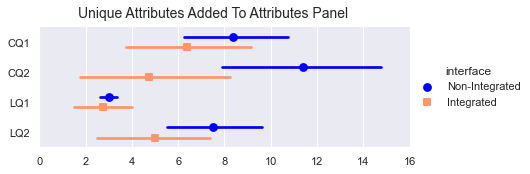

,question,interface,mean,lower_bound,uppper_bound
0,CQ1,Integrated,6.375,3.746875,9.125000
1,CQ1,Non-Integrated,8.375,6.246875,10.750000
2,CQ2,Integrated,4.750,1.750000,8.250000
3,CQ2,Non-Integrated,11.375,7.875000,14.753125
4,LQ1,Integrated,2.750,1.500000,4.000000
5,LQ1,Non-Integrated,3.000,2.625000,3.375000
6,LQ2,Integrated,5.000,2.496875,7.378125
7,LQ2,Non-Integrated,7.500,5.500000,9.625000


In [6]:
# get data
C_AttrPanel_AttrAdded = control_interactions_df[
    ["order", "interface", "question", "uniqueAttributesAddedToAttributesPanel"]
]
A_AttrPanel_AttrAdded = augmentation_interactions_df[
    ["order", "interface", "question", "uniqueAttributesAddedToAttributesPanel"]
]
AttrPanel_AttrAdded = pd.concat([
    C_AttrPanel_AttrAdded,
    A_AttrPanel_AttrAdded
])

# Create plot
g = sns.catplot(
    x="uniqueAttributesAddedToAttributesPanel", 
    y="question",
    hue="interface", 
    data=AttrPanel_AttrAdded,
    ci=95, 
    n_boot=1000,
    kind="point",
    height=2.5,
    aspect=2.5,
    orient="h",
    palette=["#0000F4", "#FF9669"],
    markers=["o", "s"],
    dodge=0.35,
    join=False
)

# Edit plot
g.set(xlabel=None, ylabel=None)
fig = g.fig
fig.patch.set_alpha(1.0)
fig.suptitle(
    'Unique Attributes Added To Attributes Panel', 
    fontsize=14,
    x=0.44,
    y=1.04,
)
plt.xlim(0, 16)

# Save plot
plt.show()
# fig.savefig("figures/interactions/attrpanel_interactions.png", bbox_inches='tight', dpi=300)

# Get plotted values
mean_df = AttrPanel_AttrAdded.groupby(["question", "interface"])["uniqueAttributesAddedToAttributesPanel"].mean().rename("mean")
cis = [l.get_xdata() for l in g.ax.lines]
ci_lbs_df = pd.Series(
    [cis[4][0], cis[0][0], 
     cis[5][0], cis[1][0], 
     cis[6][0], cis[2][0], 
     cis[7][0], cis[3][0]],
    name="lower_bound",
    index=mean_df.index
)
ci_ubs_df = pd.Series(
    [cis[4][1], cis[0][1], 
     cis[5][1], cis[1][1], 
     cis[6][1], cis[2][1], 
     cis[7][1], cis[3][1]],
    name="uppper_bound",
    index=mean_df.index
)
tasktimes_df = pd.concat([
    mean_df,
    ci_lbs_df,
    ci_ubs_df
], axis=1).reset_index()

tasktimes_df

# Total Interactions With Encode Panel By Question

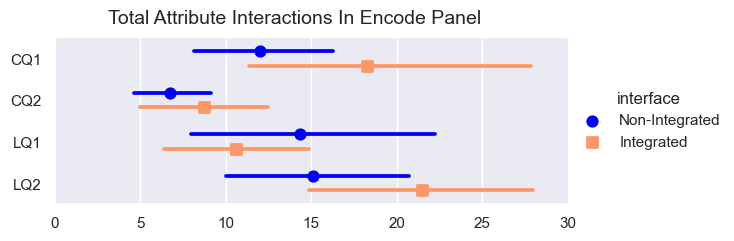

,question,interface,mean,lower_bound,uppper_bound
0,CQ1,Integrated,18.250,11.375,27.875000
1,CQ1,Non-Integrated,12.000,8.125,16.250000
2,CQ2,Integrated,8.750,5.000,12.503125
3,CQ2,Non-Integrated,6.750,4.625,9.125000
4,LQ1,Integrated,10.625,6.375,14.875000
5,LQ1,Non-Integrated,14.375,8.000,22.253125
6,LQ2,Integrated,21.500,14.875,28.000000
7,LQ2,Non-Integrated,15.125,10.000,20.750000


In [7]:
# get data
C_interactions = control_interactions_df[[
    "order",
    "interface",
    "question",
    "totalAttributesUsedInEncodePanel",
]]
A_interactions = augmentation_interactions_df[[
    "order",
    "interface",
    "question",
    "totalAttributesUsedInEncodePanel",
]]
encode_interactions = pd.concat([
    C_interactions,
    A_interactions
]).rename(columns={
    "totalAttributesUsedInEncodePanel": "Encode Panel",
})

encode_interactions_melt = pd.melt(
    encode_interactions,
    id_vars=[
        "order", 
        "interface", 
        "question", 
    ], 
    value_vars=[
        "Encode Panel",
    ],
    var_name='panel', 
    value_name='interactions'
)

# Create plot
g = sns.catplot(
    x="interactions", 
    y="question",
    hue="interface", 
    data=encode_interactions_melt,
    ci=95, 
    n_boot=1000,
    kind="point",
    height=2.5,
    aspect=2.5,
    orient="h",
    palette=["#0000F4", "#FF9669"],
    markers=["o", "s"],
    dodge=0.35,
    join=False
)

# Edit plot
g.set(xlabel=None, ylabel=None)
fig = g.fig
fig.patch.set_alpha(1.0)
fig.suptitle(
    'Total Attribute Interactions In Encode Panel', 
    fontsize=14,
    x=0.44,
    y=1.04,
)
plt.xlim(0, 30)

# Save plot
plt.show()
# fig.savefig("figures/interactions/encodepanel_interactions.png", bbox_inches='tight', dpi=300)

# Get plotted values
mean_df = encode_interactions_melt.groupby(["question", "interface"])["interactions"].mean().rename("mean")
cis = [l.get_xdata() for l in g.ax.lines]
ci_lbs_df = pd.Series(
    [cis[4][0], cis[0][0], 
     cis[5][0], cis[1][0], 
     cis[6][0], cis[2][0], 
     cis[7][0], cis[3][0]],
    name="lower_bound",
    index=mean_df.index
)
ci_ubs_df = pd.Series(
    [cis[4][1], cis[0][1], 
     cis[5][1], cis[1][1], 
     cis[6][1], cis[2][1], 
     cis[7][1], cis[3][1]],
    name="uppper_bound",
    index=mean_df.index
)
tasktimes_df = pd.concat([
    mean_df,
    ci_lbs_df,
    ci_ubs_df
], axis=1).reset_index()

tasktimes_df

# Total Interactions With Filter Panel By Question

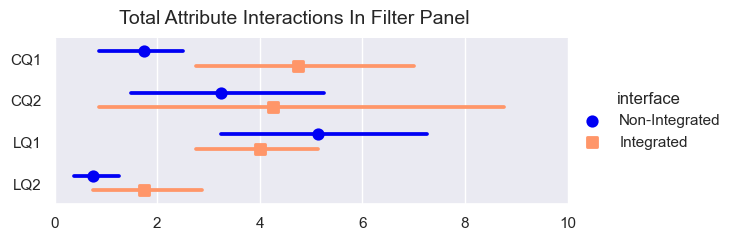

,question,interface,mean,lower_bound,uppper_bound
0,CQ1,Integrated,18.250,2.746875,7.000000
1,CQ1,Non-Integrated,12.000,0.875000,2.500000
2,CQ2,Integrated,8.750,0.875000,8.750000
3,CQ2,Non-Integrated,6.750,1.496875,5.250000
4,LQ1,Integrated,10.625,2.750000,5.128125
5,LQ1,Non-Integrated,14.375,3.250000,7.250000
6,LQ2,Integrated,21.500,0.750000,2.878125
7,LQ2,Non-Integrated,15.125,0.375000,1.250000


In [8]:
# get data
C_interactions = control_interactions_df[[
    "order",
    "interface",
    "question",
    "totalAttributesUsedInFilterPanel",
]]
A_interactions = augmentation_interactions_df[[
    "order",
    "interface",
    "question",
    "totalAttributesUsedInFilterPanel",
]]
filter_interactions = pd.concat([
    C_interactions,
    A_interactions
]).rename(columns={
    "totalAttributesUsedInFilterPanel": "Filter Panel",
})

filter_interactions_melt = pd.melt(
    filter_interactions,
    id_vars=[
        "order", 
        "interface", 
        "question", 
    ], 
    value_vars=[
        "Filter Panel",
    ],
    var_name='panel', 
    value_name='interactions'
)

# Create plot
g = sns.catplot(
    x="interactions", 
    y="question",
    hue="interface", 
    data=filter_interactions_melt,
    ci=95, 
    n_boot=1000,
    kind="point",
    height=2.5,
    aspect=2.5,
    orient="h",
    palette=["#0000F4", "#FF9669"],
    markers=["o", "s"],
    dodge=0.35,
    join=False
)

# Edit plot
g.set(xlabel=None, ylabel=None)
fig = g.fig
fig.patch.set_alpha(1.0)
fig.suptitle(
    'Total Attribute Interactions In Filter Panel', 
    fontsize=14,
    x=0.44,
    y=1.04,
)
plt.xlim(0, 10)

# Save plot
plt.show()
# fig.savefig("figures/interactions/filterpanel_interactions.png", bbox_inches='tight', dpi=300)

# Get plotted values
mean_df = encode_interactions_melt.groupby(["question", "interface"])["interactions"].mean().rename("mean")
cis = [l.get_xdata() for l in g.ax.lines]
ci_lbs_df = pd.Series(
    [cis[4][0], cis[0][0], 
     cis[5][0], cis[1][0], 
     cis[6][0], cis[2][0], 
     cis[7][0], cis[3][0]],
    name="lower_bound",
    index=mean_df.index
)
ci_ubs_df = pd.Series(
    [cis[4][1], cis[0][1], 
     cis[5][1], cis[1][1], 
     cis[6][1], cis[2][1], 
     cis[7][1], cis[3][1]],
    name="uppper_bound",
    index=mean_df.index
)
tasktimes_df = pd.concat([
    mean_df,
    ci_lbs_df,
    ci_ubs_df
], axis=1).reset_index()

tasktimes_df

# Total Interactions with Secondary Attributes in the Integrated Interface Between Panels

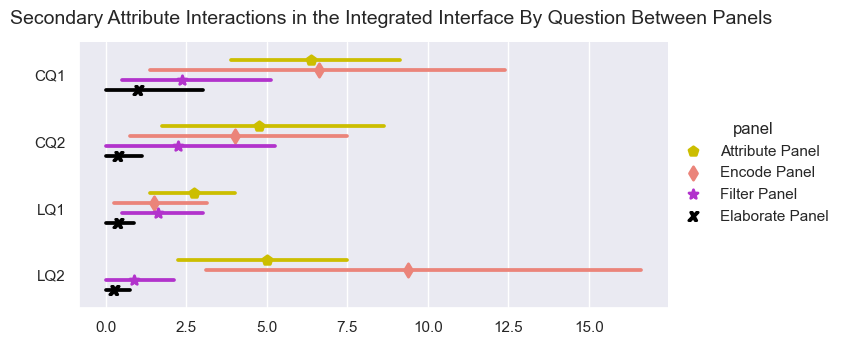

,question,panel,mean,lower_bound,upper_bound
0,CQ1,Attribute Panel,6.375,3.875000,9.125000
1,CQ1,Elaborate Panel,1.000,0.000000,3.000000
2,CQ1,Encode Panel,6.625,1.375000,12.381250
3,CQ1,Filter Panel,2.375,0.493750,5.125000
4,CQ2,Attribute Panel,4.750,1.750000,8.625000
5,CQ2,Elaborate Panel,0.375,0.000000,1.125000
6,CQ2,Encode Panel,4.000,0.750000,7.500000
7,CQ2,Filter Panel,2.250,0.000000,5.250000
8,LQ1,Attribute Panel,2.750,1.375000,4.000000
9,LQ1,Elaborate Panel,0.375,0.000000,0.875000


In [9]:
# Get Data
A_SecAttrAdded = augmentation_interactions_df[[
    "order", 
    "interface", 
    "question", 
    "uniqueAttributesAddedToAttributesPanel",
    "totalSecondaryAttributesUsedInEncodePanel",
    "totalSecondaryAttributesUsedInFilterPanel",
    "uniqueAttributesAddedToElaboratePanel",
]].rename(columns={
    "uniqueAttributesAddedToAttributesPanel": "Attribute Panel",
    "totalSecondaryAttributesUsedInEncodePanel": "Encode Panel",
    "totalSecondaryAttributesUsedInFilterPanel": "Filter Panel",
    "uniqueAttributesAddedToElaboratePanel": "Elaborate Panel",
})

A_SecAttrAdded_melt = pd.melt(
    A_SecAttrAdded,
    id_vars=[
        "order", 
        "interface", 
        "question", 
    ], 
    value_vars=[
        "Attribute Panel",
        "Encode Panel",
        "Filter Panel",
        "Elaborate Panel",
    ],
    var_name='panel', 
    value_name='interactions'
)

# Create plot
g = sns.catplot(
    x="interactions", 
    y="question",
    hue="panel", 
    data=A_SecAttrAdded_melt, 
    ci=95, 
    n_boot=1000,
    kind="point",
    height=3.5,
    aspect=2,
    orient="h",
    palette=["#CCBE00", "#EB847A", "#B233CC", "#000000"],
    markers=["p", "d", "*", "$x$"],
    dodge=0.45,
    join=False,
)

# Edit plot
g.set(xlabel=None, ylabel=None)
fig = g.fig
fig.patch.set_alpha(1.0)
fig.suptitle(
    'Secondary Attribute Interactions in the Integrated Interface By Question Between Panels', 
    fontsize=14,
    x=0.48,
    y=1.04,
)

# Save plot
plt.show()
# fig.savefig("figures/interactions/secondaryattr_interactions_integrated.png", bbox_inches='tight', dpi=300)

# Get plotted values
mean_df = A_SecAttrAdded_melt.groupby(["question", "panel"])["interactions"].mean().rename("mean")
cis = [l.get_xdata() for l in g.ax.lines]
ci_lbs_df = pd.Series(
    [cis[0][0], cis[12][0], cis[4][0], cis[8][0],   
     cis[1][0], cis[13][0], cis[5][0], cis[9][0],   
     cis[2][0], cis[14][0], cis[6][0], cis[10][0],  
     cis[3][0], cis[15][0], cis[7][0], cis[11][0]],
    name="lower_bound",
    index=mean_df.index
)
ci_ubs_df = pd.Series(
    [cis[0][1], cis[12][1], cis[4][1], cis[8][1],   
     cis[1][1], cis[13][1], cis[5][1], cis[9][1],  
     cis[2][1], cis[14][1], cis[6][1], cis[10][1], 
     cis[3][1], cis[15][1], cis[7][1], cis[11][1]],
    name="upper_bound",
    index=mean_df.index
)
tasktimes_df = pd.concat([
    mean_df,
    ci_lbs_df,
    ci_ubs_df
], axis=1).reset_index()

tasktimes_df

# Total Primary vs Secondary Attribute Interactions in the Encode and Filter Panels of the Integrated Interface

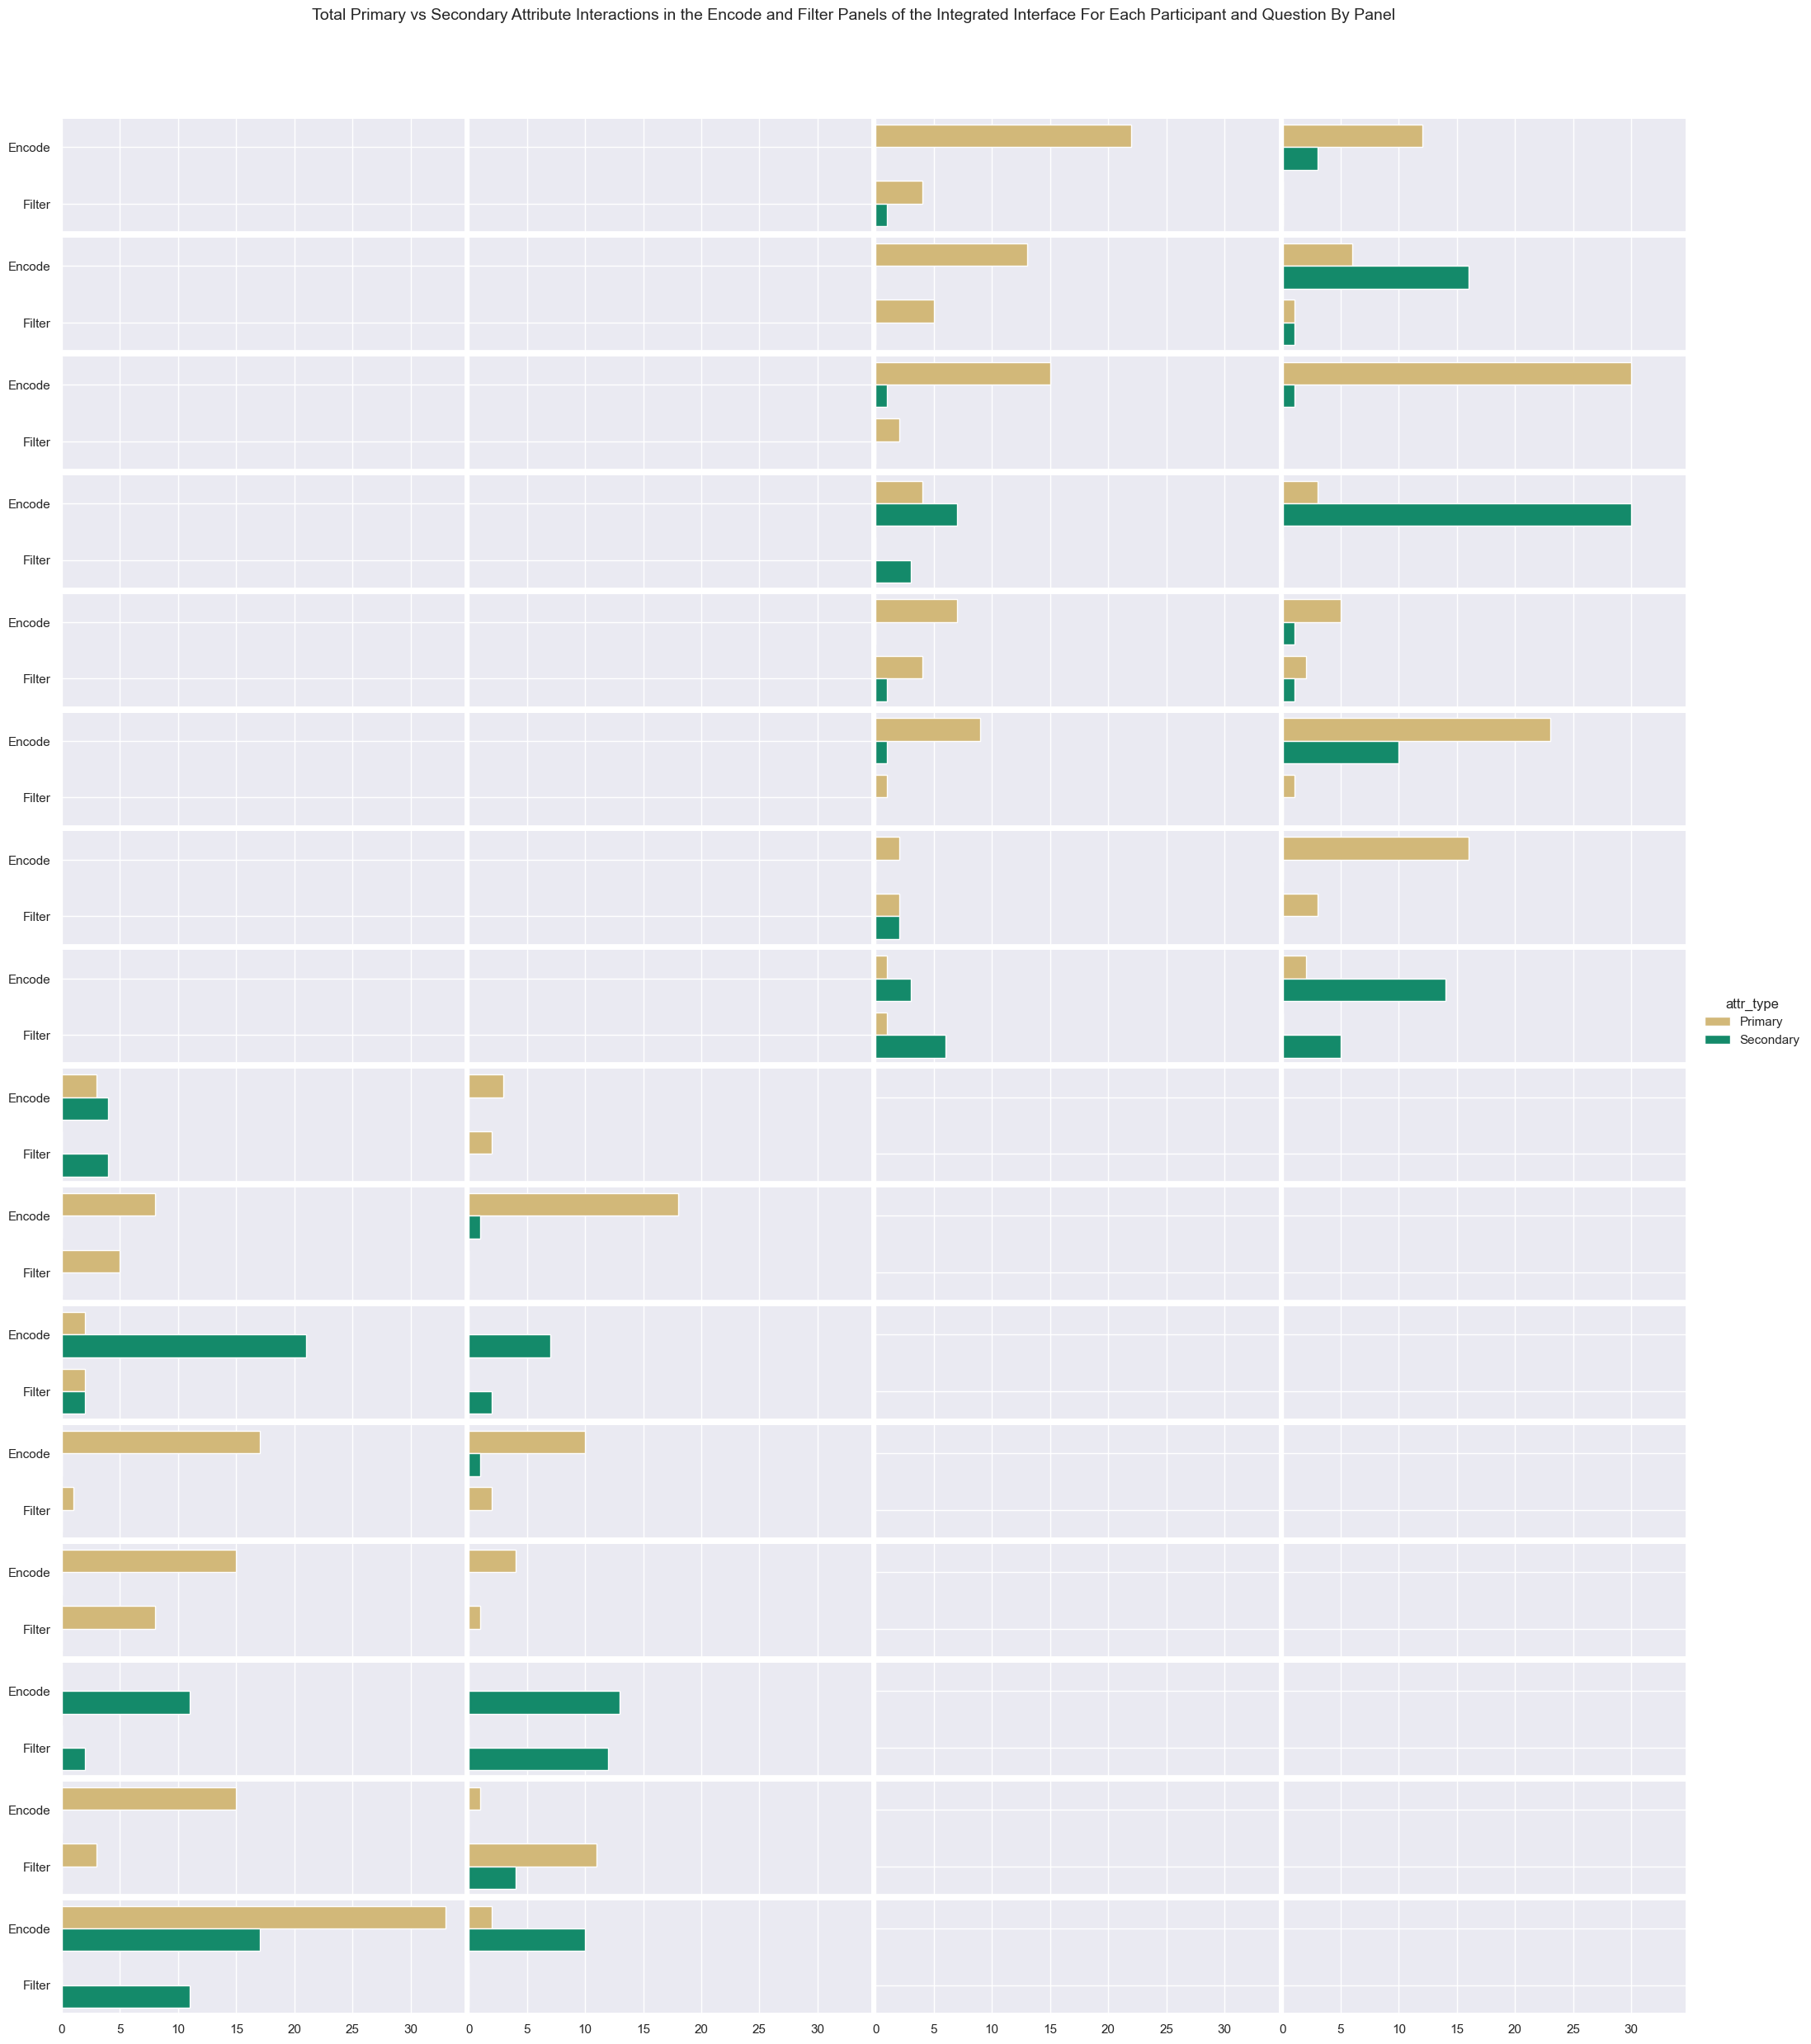

In [10]:
# Get Data
A_EncAttr = augmentation_interactions_df.reset_index()[[
    "index", 
    "order",
    "interface", 
    "question", 
    "totalPrimaryAttributesUsedInEncodePanel",
    "totalSecondaryAttributesUsedInEncodePanel",
    "totalPrimaryAttributesUsedInFilterPanel",
    "totalSecondaryAttributesUsedInFilterPanel",
]].rename(columns={
    "index": "pid",
    "totalPrimaryAttributesUsedInEncodePanel": "Encode - Primary",
    "totalSecondaryAttributesUsedInEncodePanel": "Encode - Secondary",
    "totalPrimaryAttributesUsedInFilterPanel": "Filter - Primary",
    "totalSecondaryAttributesUsedInFilterPanel": "Filter - Secondary",
})

A_EncAttr_melt = pd.melt(
    A_EncAttr,
    id_vars=[
        "pid",
        "order",
        "interface", 
        "question", 
    ], 
    value_vars=[
        "Encode - Primary",
        "Encode - Secondary",
        "Filter - Primary",
        "Filter - Secondary",
    ],
    var_name='panel - attr_type', 
    value_name='interactions'
)

A_EncAttr_melt[['panel','attr_type']] = A_EncAttr_melt['panel - attr_type'].str.split(' - ',expand=True)
A_EncAttr_melt = A_EncAttr_melt.drop(columns=['panel - attr_type'])

# Create plot
g = sns.catplot(
    x="interactions",
    y="panel",
    hue="attr_type",
    data=A_EncAttr_melt,
    row="pid",
    col="question",
#     ci=95, 
#     n_boot=1000,
    row_order=[
        "yvoRfW5318GY",
        "wQez7lrGYiza",
        "tqJLycRmlf6B",
        "SyndXrJWn1Ei",
        "xnfPy13ddVDB",
        "CoYhbad22Jko",
        "HuW1wIIebZWn",
        "ngFQZ3PEO5NJ",
        "MQNQXUlXMlJG",
        "ruM5fRj1p3f9",
        "w7TNykrDwr1q",
        "a6RSZr6Rflrh",
        "2Ispy3RTXFLN",
        "w7TXwcLz7Ydb",
        "NvepUR3xQYb3",
        "JT7ru39Irzx7"
    ],
    kind="bar",
    height=1.5,
    aspect=3.5,
    orient="h",
    palette=["#E1BE6A", "#009E73"],
    dodge=0.35,
)

# Edit plot
g.set(xlabel=None, ylabel=None)
fig = g.fig
fig.patch.set_alpha(1.0)
fig.suptitle(
    'Total Primary vs Secondary Attribute Interactions in the Encode and Filter Panels of the Integrated Interface For Each Participant and Question By Panel', 
    fontsize=14,
    x=0.48,
    y=1.04,
)
plt.subplots_adjust(wspace=0.01, hspace=0.05)
for ax in fig.get_axes():
    ax.set_title("")

# Save plot
plt.show()
# fig.savefig("figures/interactions/primarysecondaryattr_interactions_integrated_encodefilter_RAW.png", bbox_inches='tight', dpi=300)